<a href="https://colab.research.google.com/github/msuresh3/DS_Stats/blob/main/Colab_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# Outliers -> Zscore = (xi - Mean)/std
# IQR = Q3-Q1 ; Q1 = np.percentile(sorted_data,[25]), Q3 = np.percentile(sorted_data,[75])
# Lower Fence = Q1 - (1.5*IQR)
# Higher Fence = Q1 + (1.5*IQR)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
%matplotlib inline
import statistics
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('AXISBANK.csv')
df.head()

Saving AXISBANK.csv to AXISBANK.csv


,Date,Series,Open,High,Low,Prev Close,ltp,Close,VWAP,52WH,52WL,Volume,Value,No.of Traders
0,31-Dec-24,EQ,"1,062.00","1,070.45","1,058.50","1,069.95","1,068.00","1,064.70","1,064.48","1,339.65",995.7,"52,92,136","5,63,33,87,060.50","1,61,817"
1,30-Dec-24,EQ,"1,074.10","1,096.50","1,063.95","1,077.45","1,070.00","1,069.95","1,075.16","1,339.65",995.7,"94,52,155","10,16,25,55,228.40","1,72,968"
2,27-Dec-24,EQ,"1,078.10","1,086.25","1,076.00","1,076.70","1,078.20","1,077.45","1,080.19","1,339.65",995.7,"38,01,667","4,10,65,08,621.15","1,13,788"
3,26-Dec-24,EQ,"1,083.00","1,092.60","1,072.75","1,078.90","1,077.25","1,076.70","1,078.34","1,339.65",995.7,"47,75,460","5,14,95,74,877.30","1,19,071"
4,24-Dec-24,EQ,"1,077.30","1,084.75","1,076.00","1,079.15","1,081.90","1,078.90","1,080.42","1,339.65",995.7,"43,43,694","4,69,30,16,607.75","1,28,592"


In [3]:
df['High'] = df['High'].apply(lambda x: int(x.replace(',', '').split('.')[0]))
df['Low'] = df['Low'].apply(lambda x: int(x.replace(',', '').split('.')[0]))
df['Volume'] = df['Volume'].apply(lambda x: int(x.replace(',', '').split('.')[0]))

In [4]:
def detect_outliers(data):
  outliers = []
  #threshold = 1 # 1 std
  #threshold = 2 # 2 std
  threshold = 2 # 3 std
  mean = np.mean(data)
  std = np.std(data)

  for i in data:
    z_score = (i-mean)/std
    if np.abs(z_score) > threshold:
      outliers.append(i)
  return outliers


In [5]:
detect_outliers(df['High'])

[1309, 1318, 1318, 1324, 1339, 1301, 1294, 1295, 1297, 1295, 1310]

In [9]:
def find_lower_higher_fence(data):
  dataset = sorted(data)
  q1,q3 = np.percentile(dataset,[25,75])
  iqr = q3-q1
  return q1-1.5*iqr, q3+1.5*iqr

In [10]:
find_lower_higher_fence(df['High'])

(973.0, 1325.0)

<Axes: xlabel='High'>

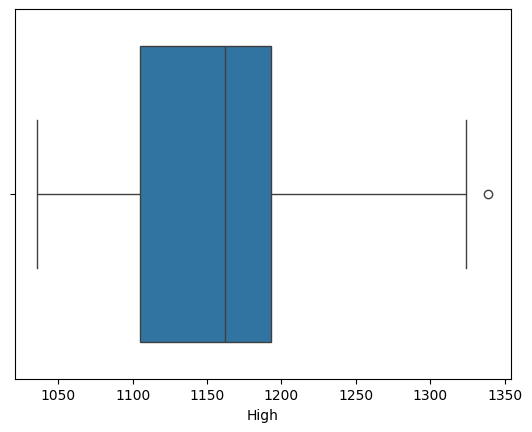

In [12]:
sns.boxplot(x=df['High'])